# Initialisation des librairies et du fichier

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Lecture du fichier
df=pd.read_csv("eco2mix-regional-cons-def.csv",sep=';',low_memory=False,  na_values=['ND', '-'])

In [ ]:
df

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
0,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76,Occitanie,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,Normandie,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,44,Grand Est,Données définitives,2013-01-01,00:00,2012-12-31T23:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121403,44,Grand Est,Données consolidées,2023-01-31,23:30,2023-01-31T22:30:00+00:00,5719.0,1314.0,5084.0,1975.0,...,46.99,34.53,43.40,0.0,0.0,10.49,26.06,2.52,55.38,NaN
2121404,27,Bourgogne-Franche-Comté,Données consolidées,2023-01-31,23:30,2023-01-31T22:30:00+00:00,2687.0,166.0,0.0,210.0,...,NaN,7.82,20.45,0.0,0.0,8.19,42.07,1.82,61.25,NaN
2121405,84,Auvergne-Rhône-Alpes,Données consolidées,2023-01-31,23:30,2023-01-31T22:30:00+00:00,8927.0,390.0,13291.0,148.0,...,97.94,1.66,20.47,0.0,0.0,32.90,25.76,1.25,58.64,NaN
2121406,93,Provence-Alpes-Côte d'Azur,Données consolidées,2023-01-31,23:30,2023-01-31T22:30:00+00:00,6139.0,350.0,0.0,44.0,...,NaN,0.72,45.83,0.0,0.0,30.14,56.68,1.40,28.96,NaN


#Nettoyage des lignes et colonnes vides

In [ ]:
#supprimer colonne 30, qui est vide
df = df.drop(columns=['Column 30'])

In [ ]:
# on retire les 12 premières lignes, qui sont vides
for i in range(0,12) :
    df=df.drop(i)

#Gestion des types de données

In [ ]:
# on affiche les informations essentielles sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121396 entries, 12 to 2121407
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Code INSEE région    int64  
 1   Région               object 
 2   Nature               object 
 3   Date                 object 
 4   Heure                object 
 5   Date - Heure         object 
 6   Consommation (MW)    float64
 7   Thermique (MW)       float64
 8   Nucléaire (MW)       float64
 9   Eolien (MW)          float64
 10  Solaire (MW)         float64
 11  Hydraulique (MW)     float64
 12  Pompage (MW)         float64
 13  Bioénergies (MW)     float64
 14  Ech. physiques (MW)  float64
 15  Stockage batterie    float64
 16  Déstockage batterie  float64
 17  Eolien terrestre     float64
 18  Eolien offshore      float64
 19  TCO Thermique (%)    float64
 20  TCH Thermique (%)    float64
 21  TCO Nucléaire (%)    float64
 22  TCH Nucléaire (%)    float64
 23  TCO Eolien (%)       float64
 2

In [ ]:
# passage de la colonne Date et type date time
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
#convertir la colonne code INSEE en string
df['Code INSEE région'] = df['Code INSEE région'].astype('str')

In [ ]:
# convertir la variable heure
df['Heure'] = pd.to_datetime(df['Heure'], format='%H:%M').dt.time

In [ ]:
#ajout d'une colonne pour avoir le numéro du jour de la semaine, utile pour comparer les jours de la semaine
df['JourSemaine']=df['Date'].dt.weekday

#Gestion des doublons

In [ ]:
#identifier les doublons
df.duplicated().sum()

0

In [ ]:
# Suppression des doublons
df_clean = df.drop_duplicates()


#Gestion des valeurs manquantes

In [ ]:
# Identification des valeurs manquantes
pd.DataFrame({
    "Nb valeurs manquantes" : df.isna().sum(),
    "% valeurs manquantes" : df.isna().mean() * 100})

,Nb valeurs manquantes,% valeurs manquantes
Code INSEE région,0,0.000000
Région,0,0.000000
Nature,0,0.000000
Date,0,0.000000
Heure,0,0.000000
Date - Heure,0,0.000000
Consommation (MW),0,0.000000
Thermique (MW),0,0.000000
Nucléaire (MW),701275,33.057242
Eolien (MW),96,0.004525


In [ ]:
# Traitement des NaN par interpolation temporelle

# Trier par date avant interpolation
df_clean = df_clean.sort_values(by='Date')

# Interpolation linéaire temporelle sur toutes les colonnes numériques
df_clean = df_clean.interpolate(method='linear')

# Vérifie s'il reste des NaN après interpolation
print(df_clean.isna().sum())


C:\Users\LaurieBESINET\AppData\Local\Temp\ipykernel_6232\2924798078.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_clean = df_clean.interpolate(method='linear')


Code INSEE région            0
Région                       0
Nature                       0
Date                         0
Heure                        0
Date - Heure                 0
Consommation (MW)            0
Thermique (MW)               0
Nucléaire (MW)               1
Eolien (MW)                  0
Solaire (MW)                 0
Hydraulique (MW)             0
Pompage (MW)                 2
Bioénergies (MW)             0
Ech. physiques (MW)          0
Stockage batterie      1683060
Déstockage batterie    1683060
Eolien terrestre       1683060
Eolien offshore        1683060
TCO Thermique (%)      1472244
TCH Thermique (%)      1472244
TCO Nucléaire (%)      1472247
TCH Nucléaire (%)      1472247
TCO Eolien (%)         1472244
TCH Eolien (%)         1472244
TCO Solaire (%)        1472244
TCH Solaire (%)        1472244
TCO Hydraulique (%)    1472244
TCH Hydraulique (%)    1472244
TCO Bioénergies (%)    1472244
TCH Bioénergies (%)    1472244
JourSemaine                  0
dtype: i

In [ ]:
# Certaines colonnes n'ont pas été interpolées parce qu'elles ont encore énormément de NaN : Stockage batterie, Déstockage batterie, 	Éolien terrestre, Éolien offshore.
# ça signifie que ces colonnes sont presque entièrement vides.

# On regarde les différentes valeurs dans ces colonnes
print('Stockage batterie :', df_clean['Stockage batterie'].unique())
print('Déstockage batterie :', df_clean['Déstockage batterie'].unique())
print('Eolien terrestre :',df_clean['Eolien terrestre'].unique())
print('Eolien offshore :', df_clean['Eolien offshore'].unique())

Stockage batterie : [nan  0.]
Déstockage batterie : [nan  0.]
Eolien terrestre : [nan  0.]
Eolien offshore : [nan  0.]


In [ ]:
# Ces colonnes ne contiennent que des valeurs vides ou égales à 0, on peut donc les supprimer

df_clean = df_clean.drop(columns = ['Stockage batterie', 'Déstockage batterie', 'Eolien terrestre', 'Eolien offshore'])

In [ ]:
# total de tous les NaN
print(df_clean.isna().sum().sum())


17666937


In [ ]:
# Identifie quelles colonnes contiennent encore des NaN

missing = df_clean.isna().sum()
print(missing[missing > 0].sort_values(ascending=False))


TCO Nucléaire (%)      1472247
TCH Nucléaire (%)      1472247
TCO Thermique (%)      1472244
TCH Thermique (%)      1472244
TCO Eolien (%)         1472244
TCH Eolien (%)         1472244
TCO Solaire (%)        1472244
TCH Solaire (%)        1472244
TCO Hydraulique (%)    1472244
TCH Hydraulique (%)    1472244
TCO Bioénergies (%)    1472244
TCH Bioénergies (%)    1472244
Pompage (MW)                 2
Nucléaire (MW)               1
dtype: int64


In [ ]:
# Toutes les colonnes TCO et TCH (%) sont quasiment entièrement vides : on remplace les valeurs manquantes par des 0.

colonnes_vides = [
    'TCO Nucléaire (%)', 'TCH Nucléaire (%)',
    'TCH Thermique (%)', 'TCO Thermique (%)',
    'TCO Eolien (%)', 'TCH Eolien (%)',
    'TCO Hydraulique (%)', 'TCH Hydraulique (%)',
    'TCO Solaire (%)', 'TCH Solaire (%)',
    'TCO Bioénergies (%)', 'TCH Bioénergies (%)']

for col in colonnes_vides:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(0)

# Pompage (MW) a toujours 2 NaN et Nucléaire (MW) en a 1. On peut les remplir par 0.

df_clean['Pompage (MW)'] = df_clean['Pompage (MW)'].fillna(0)
df_clean['Nucléaire (MW)'] = df_clean['Nucléaire (MW)'].fillna(0)

# On vérifie que c'est bon. Si ça affiche 0, ça veut dire que le dataset est maintenant propre et exploitable.

print(df_clean.isna().sum().sum())


0


#Gestion des valeurs aberrantes

##Pourcentages

In [ ]:
# Les colonnes TCO et TCH (%) représentent des %
#les colonnes TCO représentent la couverture des besoin d'une région par une filière, on considère qu'elles peuvent être > 100 quand la filière produit + que la conso de la région
#les TCH en revanche doivent rester entre 0 et 100 car elles représentent la production de la filière par rapport à sa capacité

col_TCH = ['TCH Nucléaire (%)','TCH Thermique (%)', 'TCH Eolien (%)', 'TCH Hydraulique (%)','TCH Solaire (%)', 'TCH Bioénergies (%)']

#Nombre de lignes ayant des valeurs > 100 par colonnes
display((df_clean[col_TCH] > 100).sum())

TCH Nucléaire (%)      1512
TCH Thermique (%)         0
TCH Eolien (%)          695
TCH Hydraulique (%)      89
TCH Solaire (%)           1
TCH Bioénergies (%)      74
dtype: int64

In [ ]:
#remplacer les valeurs > 100 par 100
for col in col_TCH:
    df_clean[col] = df_clean[col].apply(lambda x: 100 if x > 100 else x)

# vérifier que le nombre de valeurs supérieures à 100 est maintenant à 0
display((df_clean[col_TCH] > 100).sum())

TCH Nucléaire (%)      0
TCH Thermique (%)      0
TCH Eolien (%)         0
TCH Hydraulique (%)    0
TCH Solaire (%)        0
TCH Bioénergies (%)    0
dtype: int64

<Axes: >

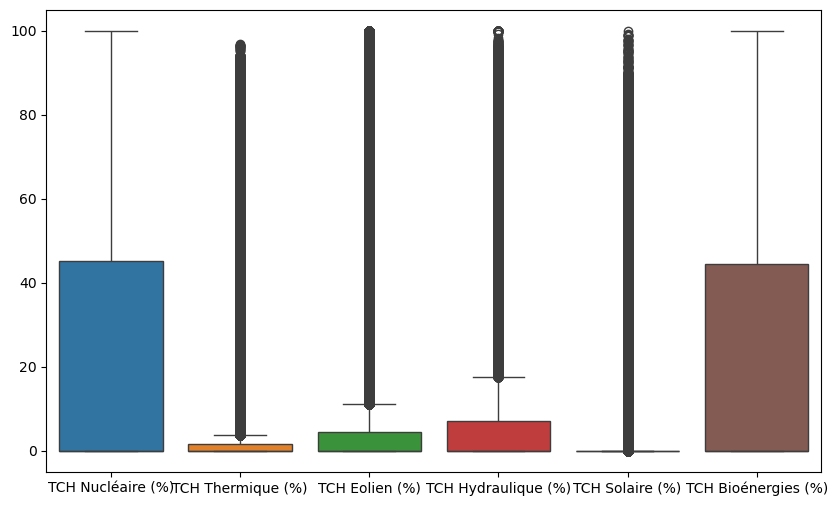

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(df_clean[col_TCH])

##Valeurs Négatives

In [ ]:
# On considère que les valeurs de production ne peuvent pas être négatives.
col_production = ['colonnes Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)']

# Les valeurs négatives sont donc mises à 0
for col in col_production:
    df_clean[col_production] = df_clean[col_production].apply(lambda x: 0 if x < 0 else x)

# vérifier que le nombre de valeurs < 0 est maintenant à 0
display((df_clean[col_production] < 0).sum())


KeyError: "['colonnes Thermique (MW)'] not in index"

#Statistiques descriptives

In [ ]:
# Statistiques descriptives
print(df_clean.describe())

       Code INSEE région                           Date  Consommation (MW)  \
count       2.121396e+06                        2121396       2.121396e+06   
mean        4.991667e+01  2018-01-16 00:14:59.760724992       4.473428e+03   
min         1.100000e+01            2013-01-01 00:00:00       7.030000e+02   
25%         2.775000e+01            2015-07-10 00:00:00       2.768000e+03   
50%         4.800000e+01            2018-01-16 00:00:00       4.102000e+03   
75%         7.525000e+01            2020-07-25 00:00:00       5.708000e+03   
max         9.300000e+01            2023-01-31 00:00:00       1.533800e+04   
std         2.564001e+01                            NaN       2.162117e+03   

       Thermique (MW)  Nucléaire (MW)   Eolien (MW)  Solaire (MW)  \
count    2.121396e+06    2.121396e+06  2.121396e+06  2.121396e+06   
mean     3.819193e+02    5.648172e+03  2.657013e+02  9.694712e+01   
min     -8.300000e+01   -1.440000e+02 -6.000000e+00 -2.300000e+01   
25%      2.500000e+01

Le jeu de données est maintenant nettoyé (colonnes inutiles supprimées), corrigé (types datetime convertis), sans doublons, sans valeurs manquantes (par interpolation ou remplissage par 0).

In [ ]:
# pour enregistrer et télécharger le fichier en local, pour garder une trace de la progression.

df_clean.to_csv("eco2mix_clean.csv", index=False)
from google.colab import files
files.download("eco2mix_clean.csv")


In [ ]:
# Fonction permettant la création d'un dictionnaire pour réaliser l'aggration /heure sur les colonnes de type numérique
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
def GetDico(df):
    dico={}
    for i in df.columns.values:
        if (is_numeric_dtype(df[f'{i}'])) and (i !='Code INSEE région'):
            dico[i]='sum'
    return dico

In [ ]:
# création d'une colonne Heure pour effectuer le regroupement par heure
df_clean['Hour']=df_clean['Heure'].apply(lambda x : str(x)[0:2])

In [ ]:
# Création e l'aggrégat par heure
df_clean=df_clean.groupby(['Code INSEE région','Région','Date','Hour']).agg(GetDico(df_clean))
df_clean.reset_index()

NameError: name 'df_clean' is not defined